<a href="https://colab.research.google.com/github/sunaypanda/Sign_Language_Interpreter/blob/main/Sign_Interpreter_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/machine_learning/tensorflow/projects/Datasets/Sign_Language/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/machine_learning/tensorflow/projects/Datasets/Sign_Language/sign_mnist_test/sign_mnist_test.csv")

test = pd.read_csv("/content/drive/MyDrive/machine_learning/tensorflow/projects/Datasets/Sign_Language/sign_mnist_test/sign_mnist_test.csv")
y = test['label']

In [3]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
data_aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

data_aug.fit(x_train)

In [6]:
model = Sequential([
    Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding='same'),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=24, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(data_aug.flow(x_train, y_train, batch_size=128),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)])

Epoch 1/20
215/215 [==============================] - 18s 50ms/step - loss: 1.0267 - accuracy: 0.6808 - val_loss: 4.7328 - val_accuracy: 0.0732 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 10s 47ms/step - loss: 0.2146 - accuracy: 0.9307 - val_loss: 2.4930 - val_accuracy: 0.3095 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 10s 48ms/step - loss: 0.0978 - accuracy: 0.9692 - val_loss: 0.0960 - val_accuracy: 0.9723 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 12s 58ms/step - loss: 0.0646 - accuracy: 0.9788 - val_loss: 0.0370 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 9s 42ms/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.0383 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 6/20
214/215 [============================>.] - ETA: 0s - loss: 0.0373 - accuracy: 0.9883
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 1

In [9]:
model.save_weights('/content/drive/MyDrive/machine_learning/tensorflow/projects/Sign_Language/sign_language_model_weights.h5')
model.save('/content/drive/MyDrive/machine_learning/tensorflow/projects/Sign_Language/sign_language_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 1s 3ms/step


<Axes: >

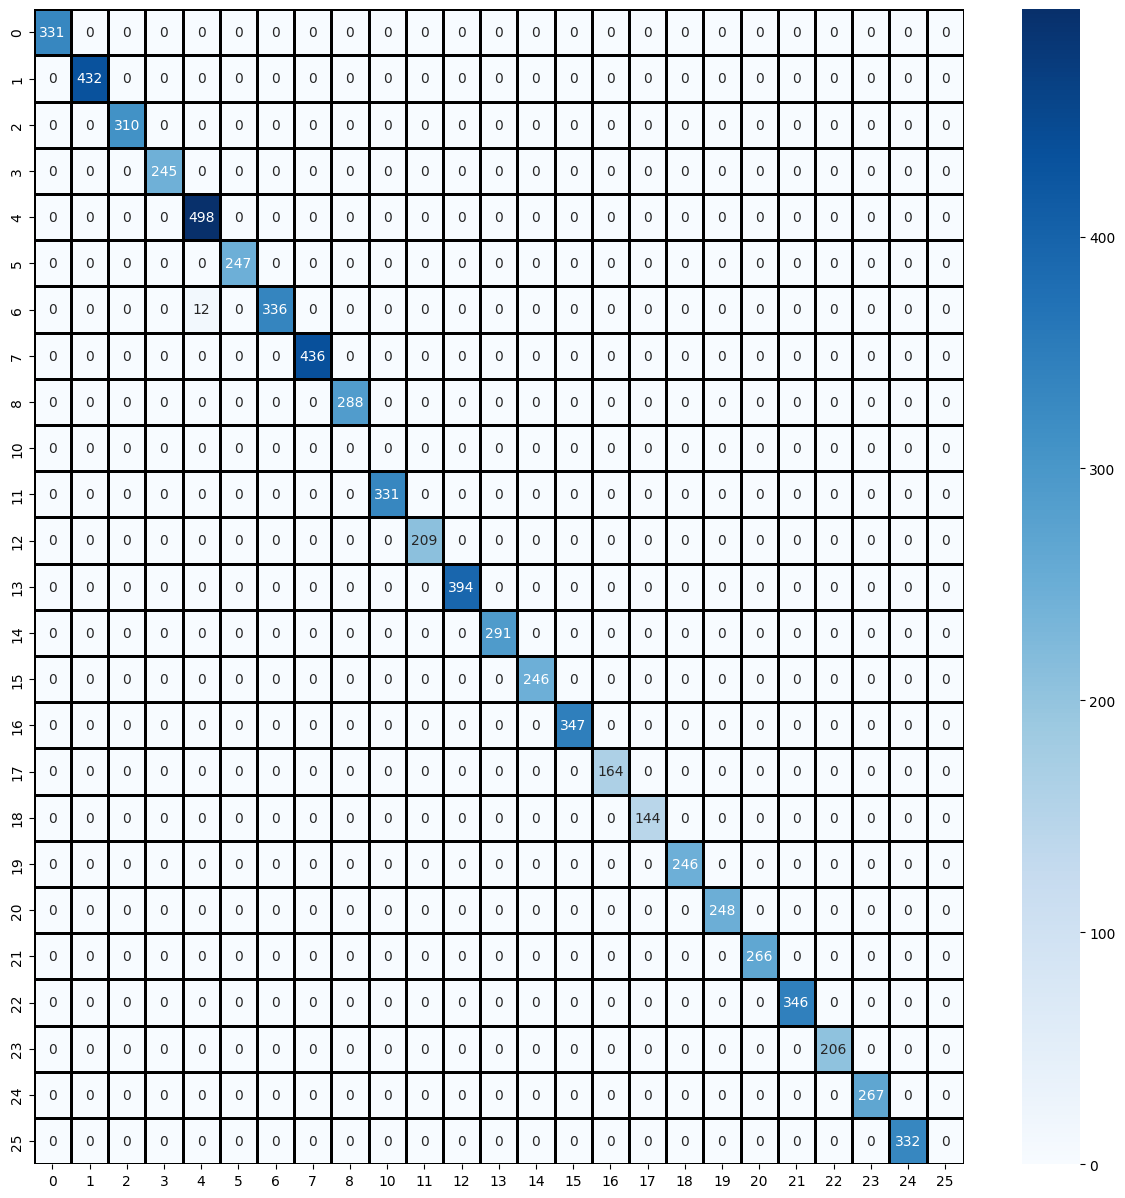

In [19]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(y,predicted_classes)
cm = pd.DataFrame(cm, index=[i for i in range(26) if i != 9], columns=[i for i in range(26) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')